# <center><h1><b><u>Bayesian Optimization with Support Vector Machine Model for Parkinson Disease Classification</h1></b></u></center>

# **1. Introduction**
Parkinson’s disease (PD) is a recognized clinical illness with a variety of etiologies
and clinical manifestations. According to current definitions, PD is defined as the presence
of bradykinesia together with either rest tremor, stiffness, or both. In the majority of
populations, genetic factors connected to known PD genes account for 3–5% of PD, which
is referred to as monogenic PD. In contrast, 90 genetic risk variations account for 16–36%
of the heritable risk of non-monogenic PD. Constipation, being a non-smoker, having a
relative with PD or tremor, and the additional causative factors all at least double the chance
of PD. There is currently no treatment that can slow or stop the course of PD, however new
knowledge about its genetic origins and processes of neuronal death is being developed.



##### **Problem Statement**
The use of machine learning (ML) algorithms is becoming increasingly common in the medical industry. As its name indicates, ML enables software to train data and develop outstanding representations in a semi-automatic manner. For the purpose of diagnosing
Parkinson’s disease (PD), several data formats have been applied to ML approaches. ML
also makes it possible to combine data from many imaging systems in order to identify
Parkinson’s disease. In order to rely on these different measures for diagnosing Parkinson’s
disease in preclinical phases or atypical structures, relevant characteristics that are not
typically utilized in the diagnosing of Parkinson’s disease are discovered through the
application of ML algorithms. This allows for the diagnosis of Parkinson’s disease in earlier
stages. In recent years, there has been an increase in the number of publications published
that discuss the use of ML to diagnose PD. Earlier studies did investigate the use of ML in
the diagnosis and assessment of Parkinson’s disease, but they were only able to evaluate
inputs from sensing devices and motor and kinematics symptoms. Computer-based
statistical methods known as machine learning algorithms may be trained to look for
recurring patterns in large volumes of data. Clinicians can use machine learning techniques
to identify patients based on several criteria at once.

# **2. Objectives**
It is possible to use model-based and model-free strategies to predict certain medical
outcomes or diagnostic characteristics. Generalized linear models are an illustration of
model-based techniques. One of the most often used model-based techniques is logistic
regression, which is useful when the output parameters are assessed on a binary scale (e.g.,
failure/success) and follow the distribution of Bernoulli. Therefore, using the predicted
probabilities as a basis, categorization may be performed. The model assumptions must
be thoroughly examined, verified, and the right connection functions must be chosen by
the investigators. Because the statistical principles may not always apply in real-world
circumstances, particularly for significant volumes of incongruent data, the model-based
procedures may not be applicable or may provide biased conclusions. This is especially
the case if there are massive quantities of incongruent data. Model-free approaches, on
the other hand, make less assumptions and accommodate the underlying characteristics
of the data without having to build any models in advance. Model-free approaches, such
as Random Forest, Support Vector Machines, AdaBoost, Neural Networks, XGBoost, and
SuperLearner are capable of building non-parametric interpretations, which are also known
as (non-parametric) techniques, from difficult data without simplifying the issue. Since
these algorithms do not provide ideal classification/regression outcomes, they benefit from
ongoing learning or retraining. Nevertheless, model-free ML algorithms offer significant
promise for tackling real-world issues when properly maintained, as well as trained and
reinforced effectively. The accurate and early identification of PD is critical because it
can reveal valuable information that can be used to slow down the course of the disease.
Classification has a purpose in PD identification to reduce time and improve treatment
effectiveness. The challenge is to find the classification method that is most effective for
PD detection; however, a study of the relevant knowledge reveals that various different
classification techniques have been employed to provide superior outcomes. The difficulty
in choosing the best classification method is that it must be applied to a local dataset.



# **3. Materials and Methods**
These days, Parkinson’s disease (PD) is very prevalent all over the world. The human
nervous system and numerous bodily components that are linked by nerves are impacted
by PD. The ML models development that can aid in disease prediction can be extremely
important for early prediction. In this study, we use a common dataset and a few machine
learning techniques to classify Parkinson’s patients. Before assessing a performance of a
model, hyper-parameter optimization enables fine-tuning. The Bayesian Optimization (BO)
approach is utilized to generate samples of hyper-parameter values in order to discover the
optimum values. Classification approaches are trained using a training set for optimization
and tested using a test set for each hyper-parameter configuration. The ideal parameter
setup is the one that provides the highest overall accuracy. The following phase involves
training each model using the original training set’s optimums, and the accuracy is assessed
by classifiers on the test set. In this study, the hyperparameters for six machine learning
models, namely, SVM, RF, LR, NB, RC, and DT, are optimized using Bayesian optimization
(BO). Twenty-three features and 195 instances make up the dataset used in this study.
Accuracy, recall, F1-score, and precision were computed as evaluation measures to assess
the effectiveness of the supposed categorization models. Using the dataset, the six machine
learning models’ performance was evaluated both before and after the hyperparameter
tuning procedure, and the experiments showed that support vector machine is the optimal
classifier among the utilized classifiers. Figure 1 shows the proposed Bayesian Optimization
for various machine learning (ML) models in Parkinson’s disease categorization.

#####  The proposed BO-ML models for Parkinson’s disease classification.

![alt text](<Screenshot 2024-06-08 122813.png>)




### **Dataset Description**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bayes_opt import BayesianOptimization
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data = pd.read_csv('parkinson.csv')
data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# Display basic information about the dataset
print("**Table 2. Dataset Features Description**")
print(data.info())

**Table 2. Dataset Features Description**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HN

In [4]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
# Display statistical analysis of the dataset
print("\n**Table 3. Statistical Analysis for the Dataset**")
print(data.describe())


**Table 3. Statistical Analysis for the Dataset**
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.00092

In [6]:
# **Table 2: Dataset Features Description:**
feature_descriptions = {
    'name': "Patient's name/Record Num",
    'MDVP:Fo(Hz)': 'Vocal fundamental (mean frequency)',
    'MDVP:Fhi(Hz)': 'Vocal fundamental (Max frequency)',
    'MDVP:Flo(Hz)': 'Vocal fundamental (Min frequency)',
    'MDVP:Jitter(%)': 'Several measurements differ in fundamental frequency (i.e., RAP, MDVP, APQ, etc.)',
    'MDVP:Jitter(Abs)': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'MDVP:RAP': 'Several measurements differ in fundamental frequency (i.e., RAP, MDVP, APQ, etc.)',
    'MDVP:PPQ': 'Several measurements differ in fundamental frequency (i.e., RAP, MDVP, APQ, etc.)',
    'Jitter:DDP': 'Several measurements differ in fundamental frequency (i.e., RAP, MDVP, APQ, etc.)',
    'MDVP:Shimmer': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'MDVP:Shimmer(dB)': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'Shimmer:APQ3': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'Shimmer:APQ5': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'MDVP:APQ': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'Shimmer:DDA': 'Several measurements differ in amplitude (i.e., APQ5, MDVP: APQ, etc.)',
    'NHR': 'The ratio of noise with regard to total components in voice',
    'HNR': 'The ratio of noise with regard to total components in voice',
    'RPDE': 'Nonlinear complexity measurements',
    'D2': 'Nonlinear complexity measurements',
    'DFA': 'Fractal scaling exponent',
    'spread1': 'Three nonlinear methods for calculating fundamental frequency variation',
    'spread2': 'Three nonlinear methods for calculating fundamental frequency variation',
    'PPE': 'Three nonlinear methods for calculating fundamental frequency variation',
    'status': 'Health status of the subject (one) - Parkinson\'s, (zero) - healthy' 
}

In [7]:
# Create a DataFrame for Table 2
table2_df = pd.DataFrame({'Column Name': feature_descriptions.keys(), 'Description': feature_descriptions.values()})
table2_df

,Column Name,Description
0,name,Patient's name/Record Num
1,MDVP:Fo(Hz),Vocal fundamental (mean frequency)
2,MDVP:Fhi(Hz),Vocal fundamental (Max frequency)
3,MDVP:Flo(Hz),Vocal fundamental (Min frequency)
4,MDVP:Jitter(%),Several measurements differ in fundamental fre...
5,MDVP:Jitter(Abs),Several measurements differ in amplitude (i.e....
6,MDVP:RAP,Several measurements differ in fundamental fre...
7,MDVP:PPQ,Several measurements differ in fundamental fre...
8,Jitter:DDP,Several measurements differ in fundamental fre...
9,MDVP:Shimmer,Several measurements differ in amplitude (i.e....


## **3.1. Min-Max Normalization**

A crucial step in any analysis that compares data from multiple domains is normaliza-
tion. Normalization moves information from a given domain to a range, such as between
(0, 1). Numerous techniques exist for normalizing data, such as decimal scaling, min-max,
Z-score, median-mad, mean-mad, and norm normalization techniques [38]. The min-max
normalization approach rescales the property from its domain to a new set of values, such
as between (0, 1). The basis of this approach is as follows:
$$f (n) = (n −min(n))/max(n) −min(n) (1)$$
where f(n) is the normalized features, and n is the input feature value. The max(n) and
min(n) are the highest and lowest sets of the input feature.


In [8]:
# Apply Min-Max normalization to the dataset
scaler = MinMaxScaler()
data.iloc[:, 1:-1] = scaler.fit_transform(data.iloc[:, 1:-1])

In [9]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,...,0.332584,0.068307,0.511745,1,0.369155,0.960148,0.569875,0.585765,0.390661,0.284654
1,phon_R01_S01_2,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,...,0.516048,0.059331,0.432577,1,0.470830,0.977024,0.703277,0.741337,0.473145,0.368674
2,phon_R01_S01_3,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,...,0.443317,0.039596,0.496220,1,0.404416,1.000000,0.636745,0.686371,0.408819,0.332634
3,phon_R01_S01_4,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,...,0.475478,0.040997,0.495936,1,0.416255,0.975885,0.695627,0.738089,0.436977,0.368975
4,phon_R01_S01_5,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,...,0.584542,0.054174,0.455499,1,0.375159,0.992813,0.762472,0.513798,0.404336,0.410335


## **3.2. Bayesian Optimization**
Hyperparameters are a group of factors used in testing and training to support the
learning process. The learning rate, iterations number, batch size, hidden layers, mo-
mentum, regularization, and activation functions are examples of hyperparameters. The
parameters might be an integer or categorical or continuous variable with values ranging
from the lower to higher bounds. Hyperparameters are stable throughout the training
process, which improves model accuracy while simultaneously reducing memory usage
and training time. Based on the problem description, different models use different hyper-
parameters. There is no optimum hyperparameters that apply to all models [39].
The term “Bayesian Optimization (BO)” refers to a method that may be used in a
sequential fashion to optimize the parameters of any black-box function f(x). BO integrates
prior belief for the purpose of evaluating a response surface function fˆ(x), utilizing fˆ(x)
to choose the configuration xn to try, evaluates f(xn) by using true f(x), specifies posterior
belief through assessed performance f(xn), and continues the procedure in sequential
manner until a stop criteria is arrived at to tune the test sample for achieving enhanced
parameters that collaborate for better classification

![alt text](<Screenshot 2024-06-14 102344-1.png>)

The Bayesian theorem forms the basis of BO. In order to update the optimization function posterior, it establishes a prior over the optimization function and collects
information from the previous sample set. Equation (2), which asserts for a model
A and observation B, is the foundation for the optimization process that based on Bayes’
Theorem.
$$P(A|B) = (P(B|A)P(A))/P(B) $$
where P(A|B) denotes the likelihood of A given B, P(B|A) represents the likelihood of B
given A, P(A) indicates the prior probability of A, and P(B) signifies the marginal probability
of B. Bayesian Optimization is utilized to determine the minimal value of a function on a
limited set.

### **3.3. Machine Learning Models Using Bayesian Hyperparameter Optimization**
We present some ML models for Parkinson’s disease categorization. The Bayesian
Optimization approach is used to fine-tune hyperparameters for six popular ML models:
SVM, RF, LR, NB, RK, and DT. The Machine Learning Repository (UCI) dataset
was used to assess the classifiers’ efficiency. BO is a hyperparameter tuning method for
improving the accuracy of machine learning models. BO seeks to collect observations
that disclose as much information as possible about the function and the position of its
optimal value With Bayesian Optimization, the ideal value might be discovered using
relatively few samples. It does not need the explicit formulation of the function, in contrast
to conventional optimization techniques. Therefore, Bayesian Optimization is ideal for
hyperparameter tuning. Therefore, initially, BO is applied to tune hyperparameters for
the Support Vector Machine (SVM) algorithm, Random Forest (RF), Logistic
Regression (LR), Naive Bayes (NB), Ridge Classifier (RC), and Decision Tree
(DT) .
SVM is a popular supervised machine learning technique used for both classification
and regression tasks; it is based on the kernel method. Because of this, we set out
to optimize the SVM hyperparameters in search of the kernel function and parameters
that would provide the most reliable model. Using a random starting point in the
hyperparameter space, the Bayesian technique iteratively assesses prospective hyperparameter configurations in light of the existing model to see if any of them enhance the
model. Based on the experimental results presented in this work, the suggested Bayesian
Optimization-Support Vector Machine (BO-SVM) achieves the greatest accuracy for the
classification process. The pseudocode of proposed approach is presented in Algorithm 1.

### **3.3.1. Splitting the Dataset**

In [10]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(['name', 'status'], axis=1)
y = data['status']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

### **3.3.2. Define Objective Function**

In [12]:
def objective_function(model, **params):
    """
    Objective function to optimize using Bayesian Optimization.

    Args:
        model (str): The name of the model to evaluate ('SVM', 'RF', 'LR', etc.).
        **params (dict): Hyperparameters for the model.

    Returns:
        float: Accuracy score on the test set (to be maximized).
    """
    print(f"Evaluating model: {model}")
    print(f"Hyperparameters: {params}")

    if model == 'SVM':
        clf = SVC(**params)
    elif model == 'RF':
        clf = RandomForestClassifier(**params)
    elif model == 'LR':
        clf = LogisticRegression(**params)
    elif model == 'NB':
        clf = GaussianNB(**params)
    elif model == 'RC':
        clf = RidgeClassifier(**params)
    elif model == 'DT':
        clf = DecisionTreeClassifier(**params)
    else:
        raise ValueError("Invalid model name.")
    
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()


### **3.3.3. Define Hyperparameter Search Space**

In [13]:
param_space = {
'SVM': {'C': Real(0.4, 0.400000000000001, 'uniform'), 'kernel': Categorical(['rbf'])},
'RF': {'n_estimators': Integer(10, 10.001), 'criterion': Categorical(['gini'])},
'LR': {'penalty': Categorical(['l2']), 'solver': Categorical(['lbfgs'])},
'NB': {'var_smoothing': Real(0.00001, 0.00002, 'uniform')},
'RC': {'alpha': Real(0.4, 0.41, 'uniform'), 'copy_X': Categorical([False]), 'fit_intercept': Categorical([True]), 'normalize': Categorical([False]), 'solver': Categorical(['lsqr']), 'tol': Real(0.01, 0.011, 'uniform')},
'DT': {'criterion': Categorical(['entropy']), 'splitter': Categorical(['random'])}
}

### **3.3.4. Perform Bayesian Optimization**

In [14]:
results = {}
for model_name in param_space.keys():
    print(f"\n--- Optimizing hyperparameters for {model_name} ---")
    if model_name in ['SVM', 'RF', 'LR', 'DT']:
        cat_key = 'kernel' if model_name == 'SVM' else 'criterion' if model_name in ['RF', 'DT'] else 'penalty'

        # Correctly create modified_param_space:
        modified_param_space = {}
        category_mappings = {}
        for k, v in param_space[model_name].items():
            if k == cat_key:
                continue  # Skip the category being iterated
            if isinstance(v, Real) or isinstance(v, Integer):
                modified_param_space[k] = (v.low, v.high)  # Extract the bounds
            elif isinstance(v, Categorical):
                # Create mappings for categorical variables
                category_mappings[k] = {i: category for i, category in enumerate(v.categories)}
                modified_param_space[k] = (0, len(v.categories) - 1)  # Map categories to integers

        for category in param_space[model_name][cat_key].categories:
            print(f"  - Trying category: {category}")

            def optimization_function(**params):
                params[cat_key] = category
                for key, mapping in category_mappings.items():
                    params[key] = mapping[int(params[key])]
                if 'n_estimators' in params:
                    params['n_estimators'] = int(params['n_estimators'])
                return objective_function(model=model_name, **params)

            optimizer = BayesianOptimization(
                f=optimization_function,
                pbounds=modified_param_space,
                random_state=42,
                allow_duplicate_points=True
            )
            optimizer.maximize(init_points=5, n_iter=25)

            results[f"{model_name}_{category}"] = optimizer.max
            print(f"    Best hyperparameters: {optimizer.max['params']}")

    else:
        # Models without categorical hyperparameters
        def optimization_function(**params):
            return objective_function(model=model_name, **params)

        optimizer = BayesianOptimization(
            f=optimization_function,
            pbounds={k: (v.low, v.high) for k, v in param_space[model_name].items() if isinstance(v, (Real, Integer))},
            random_state=42,
            allow_duplicate_points=True
        )
        optimizer.maximize(init_points=5, n_iter=25)
        results[model_name] = optimizer.max
        print(f"  Best hyperparameters: {optimizer.max['params']}")



--- Optimizing hyperparameters for SVM ---
  - Trying category: rbf
|   iter    |  target   |     C     |
-------------------------------------
Evaluating model: SVM
Hyperparameters: {'C': 0.4000000000000004, 'kernel': 'rbf'}
| 1         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.40000000000000097, 'kernel': 'rbf'}
| 2         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.40000000000000074, 'kernel': 'rbf'}
| 3         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.40000000000000063, 'kernel': 'rbf'}
| 4         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.4000000000000002, 'kernel': 'rbf'}
| 5         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.4000000000000002, 'kernel': 'rbf'}
Data point [0.4] is not unique. 1 duplicates registered. Continuing ...
| 6         | 0.8207    | 0.4       |
Evaluating model: SVM
Hyperparameters: {'C': 0.4000000000000

# **4. Experimental Results**
## **4.1. Evaluation Metrics**

The experimental results were executed using jupyter notebook version (6.4.6). Jupyter
Notebook is a popular tool for data analysis and visualization in Python. It allows you to
write and run code, display visualizations, and document your findings all in one place. It
runs on a web browser and supports many programming languages, including Python 3.8.
The experiment was run using a computer with an Intel Core i5 processor and 16 GB RAM,
using the Microsoft Windows 10 operating system. In this paper Bayesian Optimization 
is used to optimize the hyperparameters for six machine learning classification models,
namely, Support Vector Machine (SVM), Random Forest (RF), Logistic Regression (LR),
Naive Bayes (NB), Ridge Classifier (RC), and Decision Tree (DT). The performance of
BO-SVM model was compared with several machine learning models. The performance of
the classification models utilized in this article was measured using four different metrics:
accuracy, recall, precision and F1 score. Accuracy is calculated using Equation (3):
$$ Accuracy = (TP + TN)/(TP + FP + FN + TN) $$
where TP if true positive, TN is true negative, FP is false positive, and FN is false negative.
Recall is calculated using Equation (4):
$$ Recall =TP/TP + FN $$

Precision is calculated using Equation (5):
$$ Precision = (TP)/(TP + FP) $$

F1 score is computed using Equation (6):
$$ F1 score = (2 ∗ Recall ∗ Precision)/(Recall + Precision) $$ 

The hyperparameters for the classification models in the experimental were optimized
using a Bayesian Optimization approach. The best hyperparameters for each model are
listed in the Table 4, where:
- Random Forest (RF): The best number of estimators was 10, using the “gini” criterion.
- Ridge Classifier (RC): The best alpha was 0.4, with “copy_X” set to false, “fit_intercept”
set to true, “normalize” set to false, and using the “lsqr” solver with a tolerance of 0.01.
- Decision Tree (DT): The best criterion was “entropy” and the best splitter was “random”.
- Naive Bayes (NB): The best alpha was 0.1 and the best value for “var_smoothing”
was 0.00001.
- Logistic Regression (LR): The best penalty was “l2” and the best solver was .“lbfgs”.
- Support Vector Machine (SVM): The best kernel was “rbf” and the best value for the
regularization parameter (C) was 0.4.

## **4.2. Model Performance with Default Hyperparameters**

In [15]:
# Train and evaluate models with default hyperparameters
models = {
    'RC': RidgeClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
}

accuracy_default = []
for model_name, model in models.items():
    # Train with default hyperparameters
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {model_name} with default hyperparameters ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    accuracy_default.append(accuracy_score(y_test, y_pred))


--- RC with default hyperparameters ---
Accuracy: 0.846

--- NB with default hyperparameters ---
Accuracy: 0.731

--- DT with default hyperparameters ---
Accuracy: 0.897

--- LR with default hyperparameters ---
Accuracy: 0.859

--- RF with default hyperparameters ---
Accuracy: 0.936

--- SVM with default hyperparameters ---
Accuracy: 0.872


#### **Table: Performance of the classification models in terms of accuracy using the default parameters.**

In [16]:
# **Table 6. Performance of the classification models in terms of accuracy using the default parameters.**

# Create a DataFrame for Table 6
table6_df = pd.DataFrame({'Models': models.keys(), 'Accuracy': accuracy_default})
table6_df['Accuracy'] = table6_df['Accuracy'].apply(lambda x: '{:.1%}'.format(x)) # Format accuracy as percentage
table6_df

,Models,Accuracy
0,RC,84.6%
1,NB,73.1%
2,DT,89.7%
3,LR,85.9%
4,RF,93.6%
5,SVM,87.2%


## **4.3. Model Performance with Optimized Hyperparameters**


--- RC with optimized hyperparameters ---
Accuracy: 0.846
F1 Score: 0.903
Recall: 0.966
Precision: 0.848
Best Hyperparameters: {'alpha': 0.40374540118847363, 'tol': 0.010950714306409915}


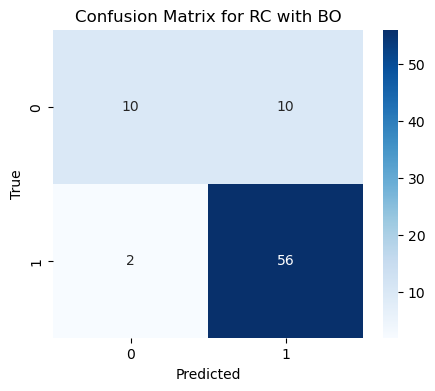


--- NB with optimized hyperparameters ---
Accuracy: 0.731
F1 Score: 0.792
Recall: 0.690
Precision: 0.930
Best Hyperparameters: {'var_smoothing': 1.3745401188473626e-05}


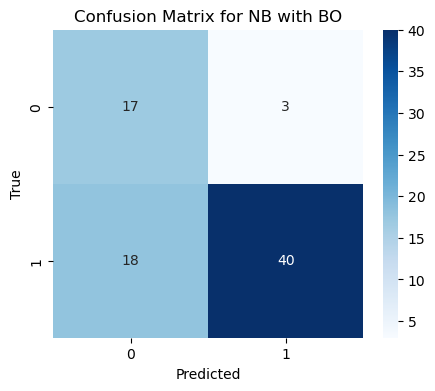


--- DT with optimized hyperparameters ---
Accuracy: 0.769
F1 Score: 0.842
Recall: 0.828
Precision: 0.857
Best Hyperparameters: {'splitter': 'random', 'criterion': 'entropy'}


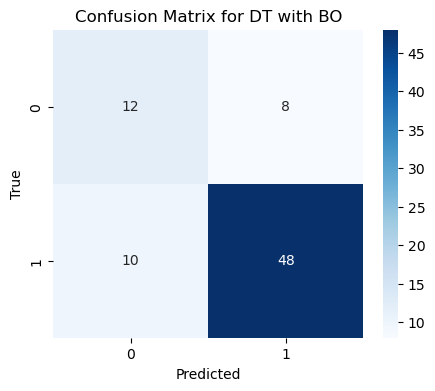


--- LR with optimized hyperparameters ---
Accuracy: 0.859
F1 Score: 0.911
Recall: 0.966
Precision: 0.862
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2'}


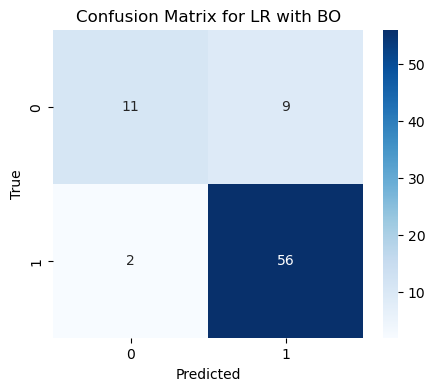


--- RF with optimized hyperparameters ---
Accuracy: 0.923
F1 Score: 0.948
Recall: 0.948
Precision: 0.948
Best Hyperparameters: {'n_estimators': 10, 'criterion': 'gini'}


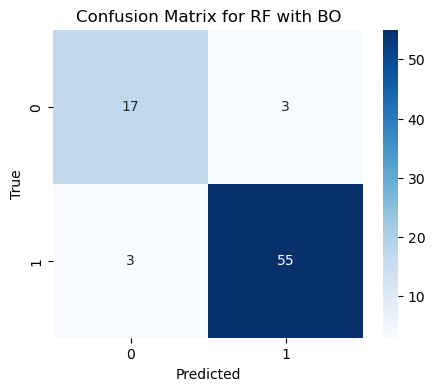


--- SVM with optimized hyperparameters ---
Accuracy: 0.846
F1 Score: 0.906
Recall: 1.000
Precision: 0.829
Best Hyperparameters: {'C': 0.4000000000000004, 'kernel': 'rbf'}


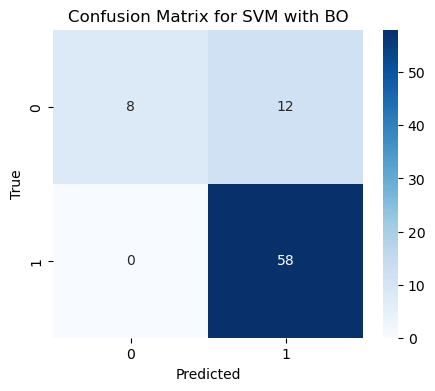

In [17]:
# Evaluate models with optimized hyperparameters 
accuracy_optimized = []
f1_scores = []
recalls = []
precisions = []
best_hyperparameters = []

for model_name, model in models.items():
    if model_name in ['SVM', 'RF', 'LR', 'DT']:
        cat_key = 'kernel' if model_name == 'SVM' else 'criterion' if model_name in ['RF', 'DT'] else 'penalty'
        best_category_key = max(
            (key for key in results if key.startswith(model_name + "_")),
            key=lambda key: results[key]['target']
        )
        optimized_params = results[best_category_key]['params'].copy()  # Create a copy of the parameters
        best_category = best_category_key.split('_')[-1]
        optimized_params[cat_key] = best_category
    else:
        optimized_params = results[model_name]['params']

    # Correctly handle categorical parameters for training:
    for param, value in optimized_params.items():
        if param in param_space[model_name]:
            if isinstance(param_space[model_name][param], Categorical):
                try:
                    optimized_params[param] = param_space[model_name][param].categories[int(value)]
                except ValueError:
                    optimized_params[param] = value
            elif param == 'n_estimators':
                optimized_params[param] = int(value)

    # Train with optimized hyperparameters
    optimized_model = model.set_params(**optimized_params)
    optimized_model.fit(X_train, y_train)
    y_pred_optimized = optimized_model.predict(X_test)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred_optimized)
    f1 = f1_score(y_test, y_pred_optimized)
    rec = recall_score(y_test, y_pred_optimized)
    prec = precision_score(y_test, y_pred_optimized)

    # Print the results
    print(f"\n--- {model_name} with optimized hyperparameters ---")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Best Hyperparameters: {optimized_params}")

    # Append the results to the lists
    accuracy_optimized.append(acc)
    f1_scores.append(f1)
    recalls.append(rec)
    precisions.append(prec)
    best_hyperparameters.append(optimized_params)

    # Generate and display confusion matrix for each optimized model
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        pd.crosstab(y_test, y_pred_optimized, rownames=['True'], colnames=['Predicted']),
        annot=True,
        fmt='g',
        cmap='Blues',
    )
    plt.title(f'Confusion Matrix for {model_name} with BO')
    plt.show()

#### **Table: Performance of the classification models using the Bayesian Optimization approach.**

In [18]:
# Create a DataFrame for Table 5
table5_df = pd.DataFrame({
    'Models': [f"BO-{model_name}" for model_name in models.keys()],
    'Accuracy': accuracy_optimized,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions
})

In [19]:
# Format the values in the DataFrame as percentages
table5_df['Accuracy'] = table5_df['Accuracy'].apply(lambda x: '{:.1%}'.format(x))
table5_df['F1 Score'] = table5_df['F1 Score'].apply(lambda x: '{:.1%}'.format(x))
table5_df['Recall'] = table5_df['Recall'].apply(lambda x: '{:.1%}'.format(x))
table5_df['Precision'] = table5_df['Precision'].apply(lambda x: '{:.1%}'.format(x))
table5_df

,Models,Accuracy,F1 Score,Recall,Precision
0,BO-RC,84.6%,90.3%,96.6%,84.8%
1,BO-NB,73.1%,79.2%,69.0%,93.0%
2,BO-DT,76.9%,84.2%,82.8%,85.7%
3,BO-LR,85.9%,91.1%,96.6%,86.2%
4,BO-RF,92.3%,94.8%,94.8%,94.8%
5,BO-SVM,84.6%,90.6%,100.0%,82.9%


#### **Table: Hyperparameters tuning for the classification models using the Bayesian Optimization approach.**

In [20]:
# **Table 4. Hyperparameters tuning for the classification models using the Bayesian Optimization approach.**
table4_df = pd.DataFrame({'Models': [f"BO-{model_name}" for model_name in models.keys()], 'Best Hyperparameters': best_hyperparameters})
table4_df

,Models,Best Hyperparameters
0,BO-RC,"{'alpha': 0.40374540118847363, 'tol': 0.010950..."
1,BO-NB,{'var_smoothing': 1.3745401188473626e-05}
2,BO-DT,"{'splitter': 'random', 'criterion': 'entropy'}"
3,BO-LR,"{'solver': 'lbfgs', 'penalty': 'l2'}"
4,BO-RF,"{'n_estimators': 10, 'criterion': 'gini'}"
5,BO-SVM,"{'C': 0.4000000000000004, 'kernel': 'rbf'}"


#### **Figure: Representation of the models in terms of accuracy using the Bayesian Optimization approach.**

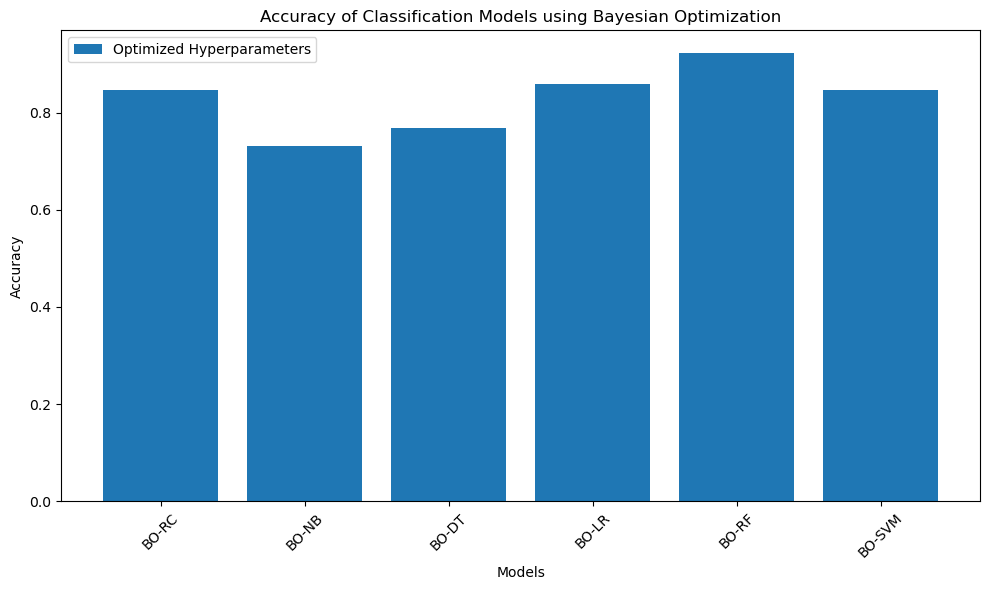

In [21]:
# Generate and display bar plot comparing accuracies
plt.figure(figsize=(10, 6))
plt.bar(table5_df["Models"], accuracy_optimized, label='Optimized Hyperparameters')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models using Bayesian Optimization')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### **Figure: Representation of the models in terms of accuracy using the default parameters.**

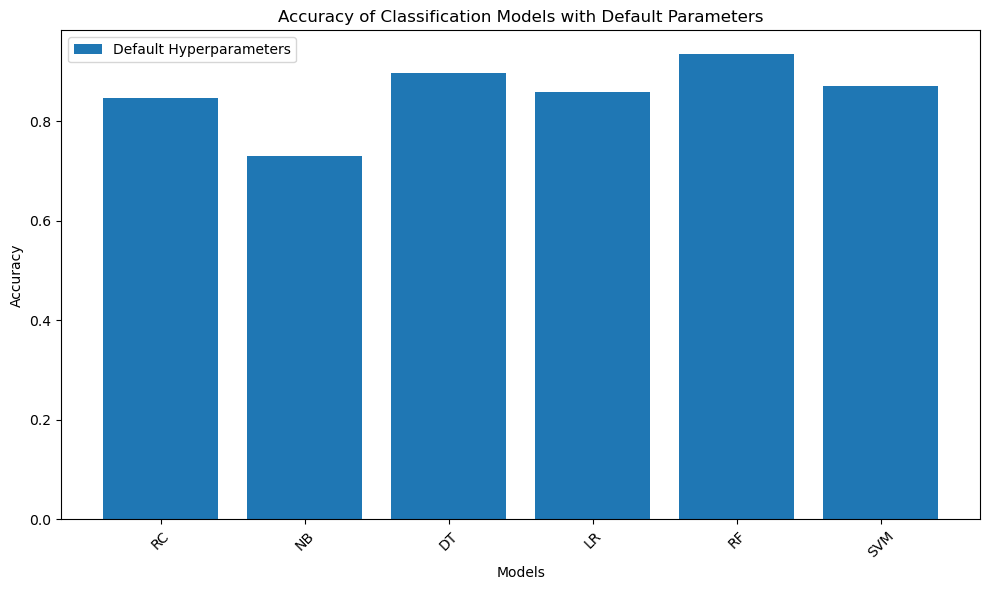

In [22]:

# **Figure 8. Representation of the models in terms of accuracy using the default parameters.**
plt.figure(figsize=(10, 6))
plt.bar(table6_df["Models"], accuracy_default, label='Default Hyperparameters')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models with Default Parameters')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# **4.4. Visualization Techniques**

### **Figure: Heatmap analysis for the dataset features.**

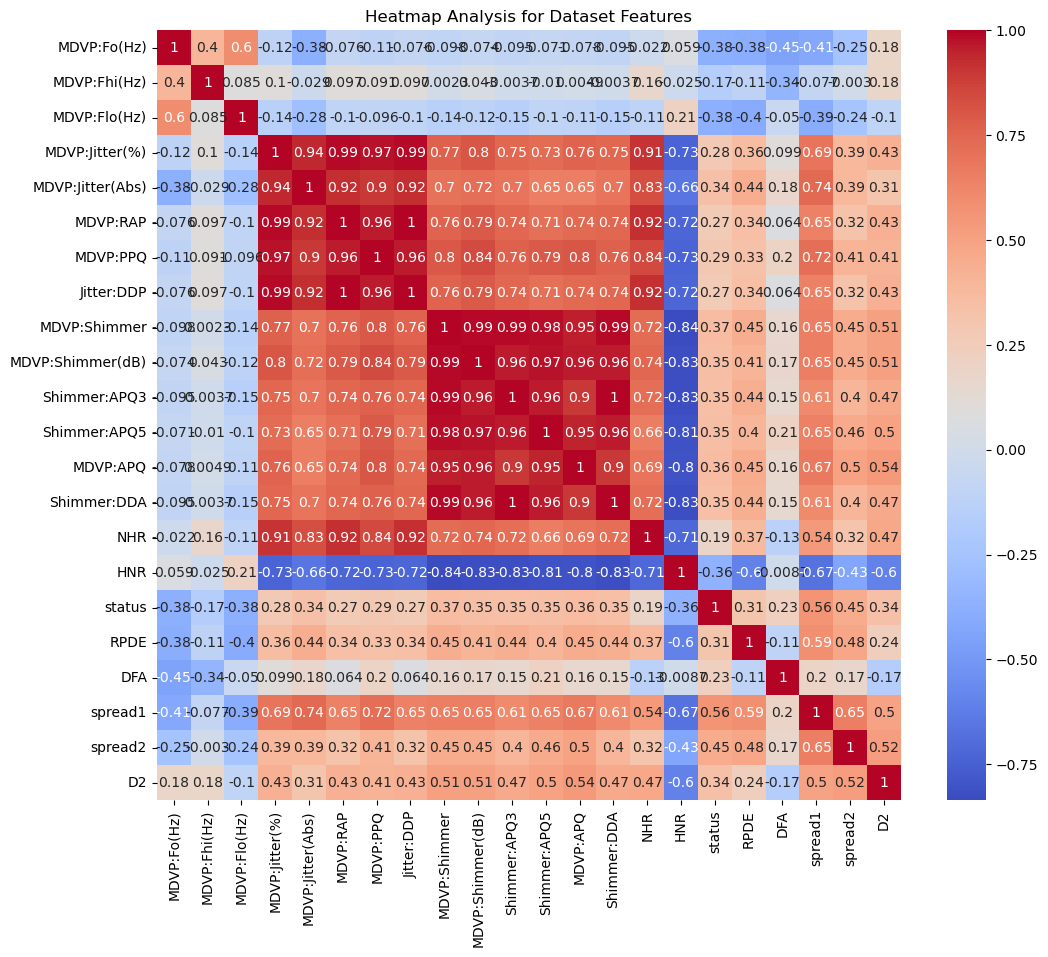

In [23]:
# Generate and display heatmap of feature correlation
plt.figure(figsize=(12, 10))
sns.heatmap(data.iloc[:, 1:-1].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Analysis for Dataset Features')
plt.show()

### **Figure: Box plot visualization per category label analysis for the dataset features.**

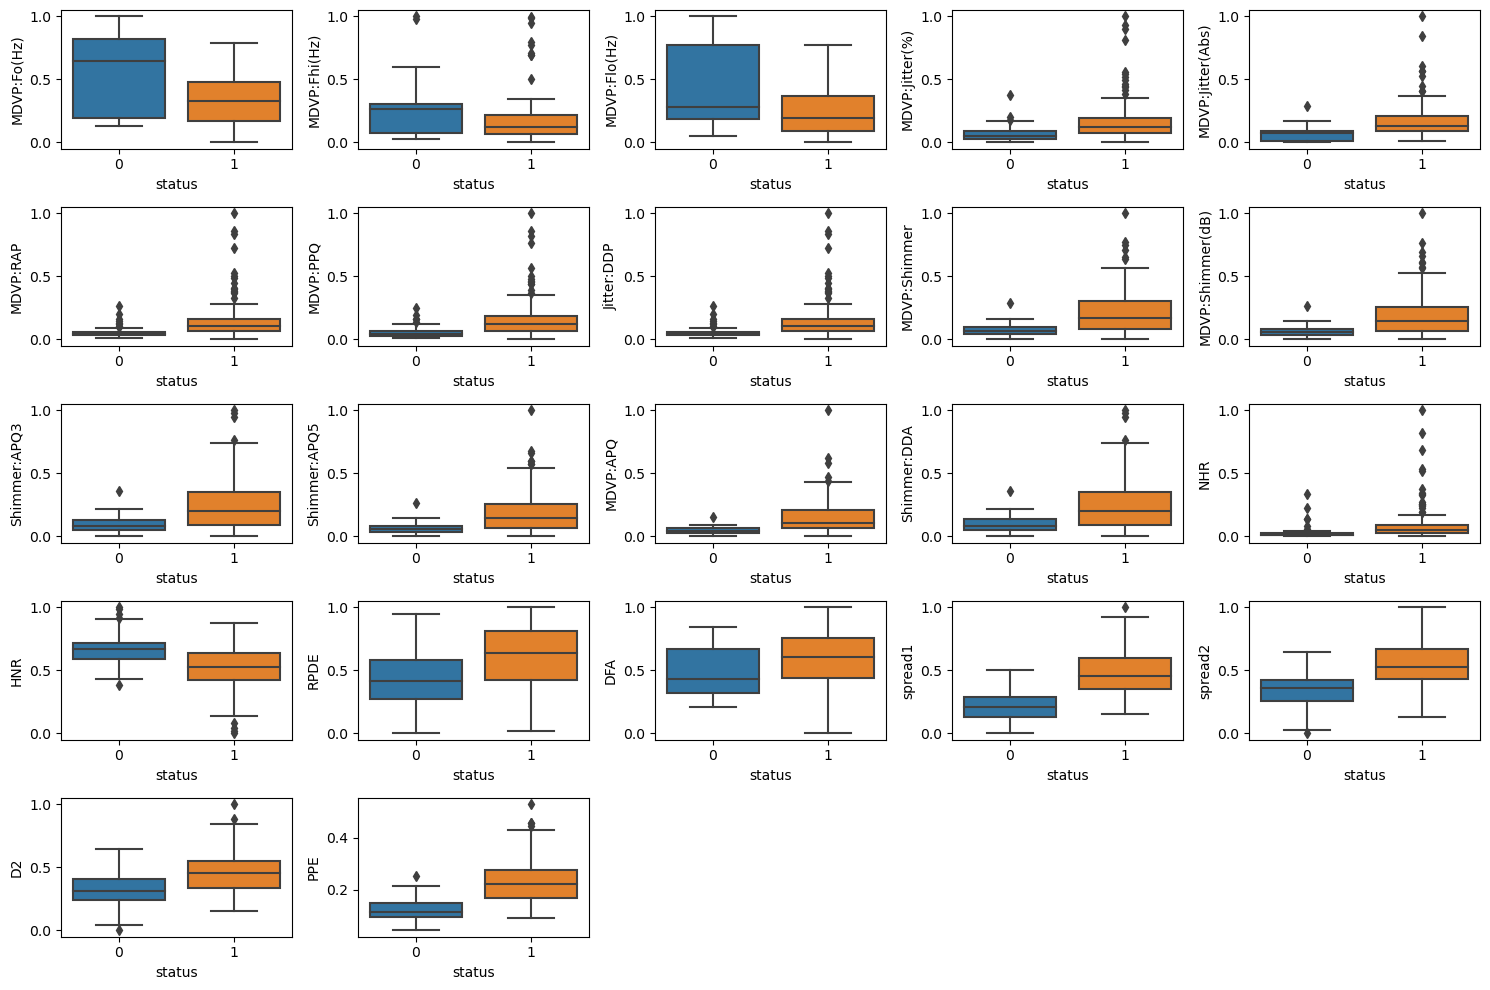

In [24]:
# Generate and display box plots for feature distribution per status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='status', y=feature, data=data)
plt.tight_layout()
plt.show()

### **Figure: Box plot for distribution analysis of the features.**

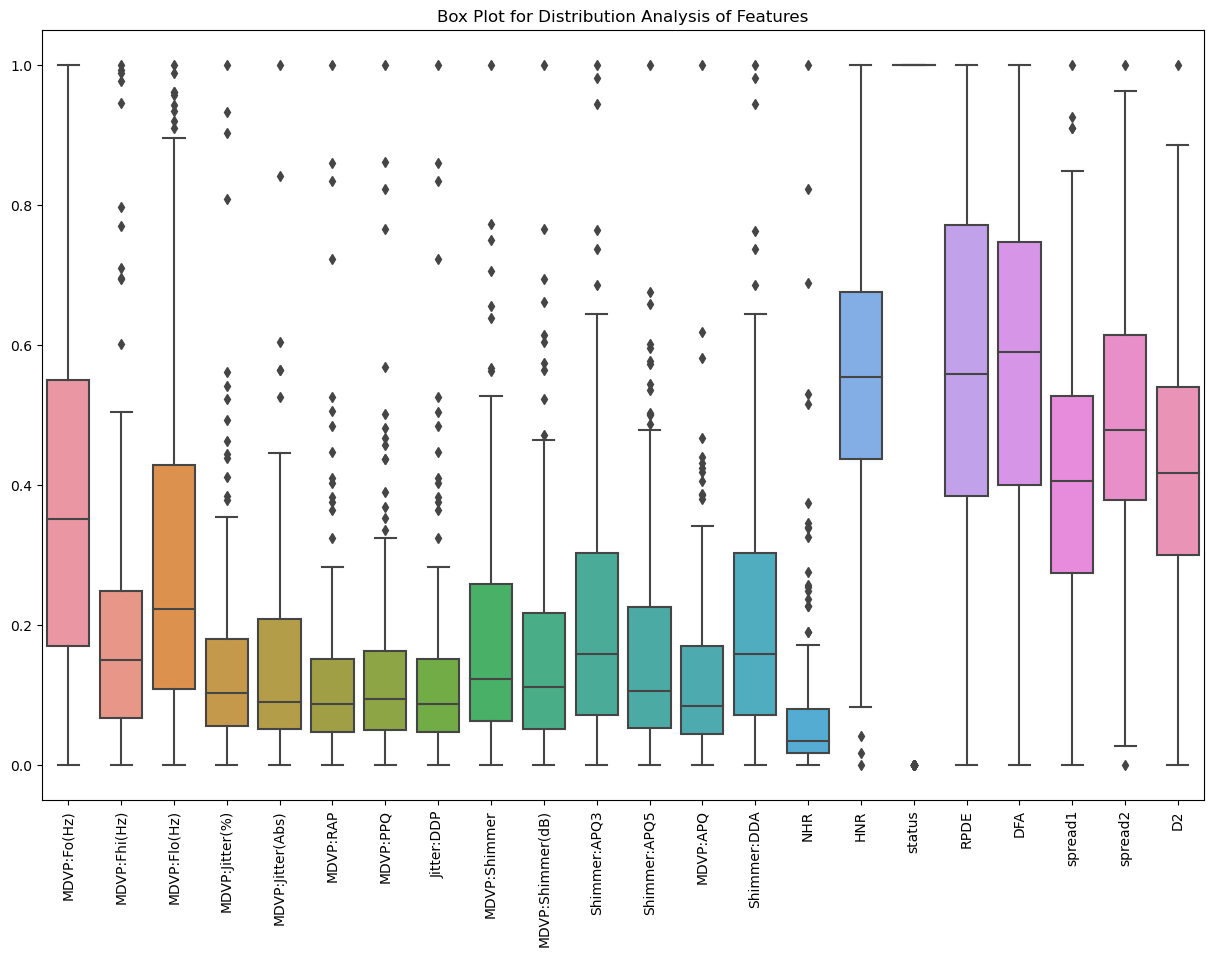

In [25]:
# Generate and display box plot for overall feature distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.iloc[:, 1:-1])
plt.title('Box Plot for Distribution Analysis of Features')
plt.xticks(rotation=90)
plt.show()

### **Figure: Histogram for distribution analysis of the features.**

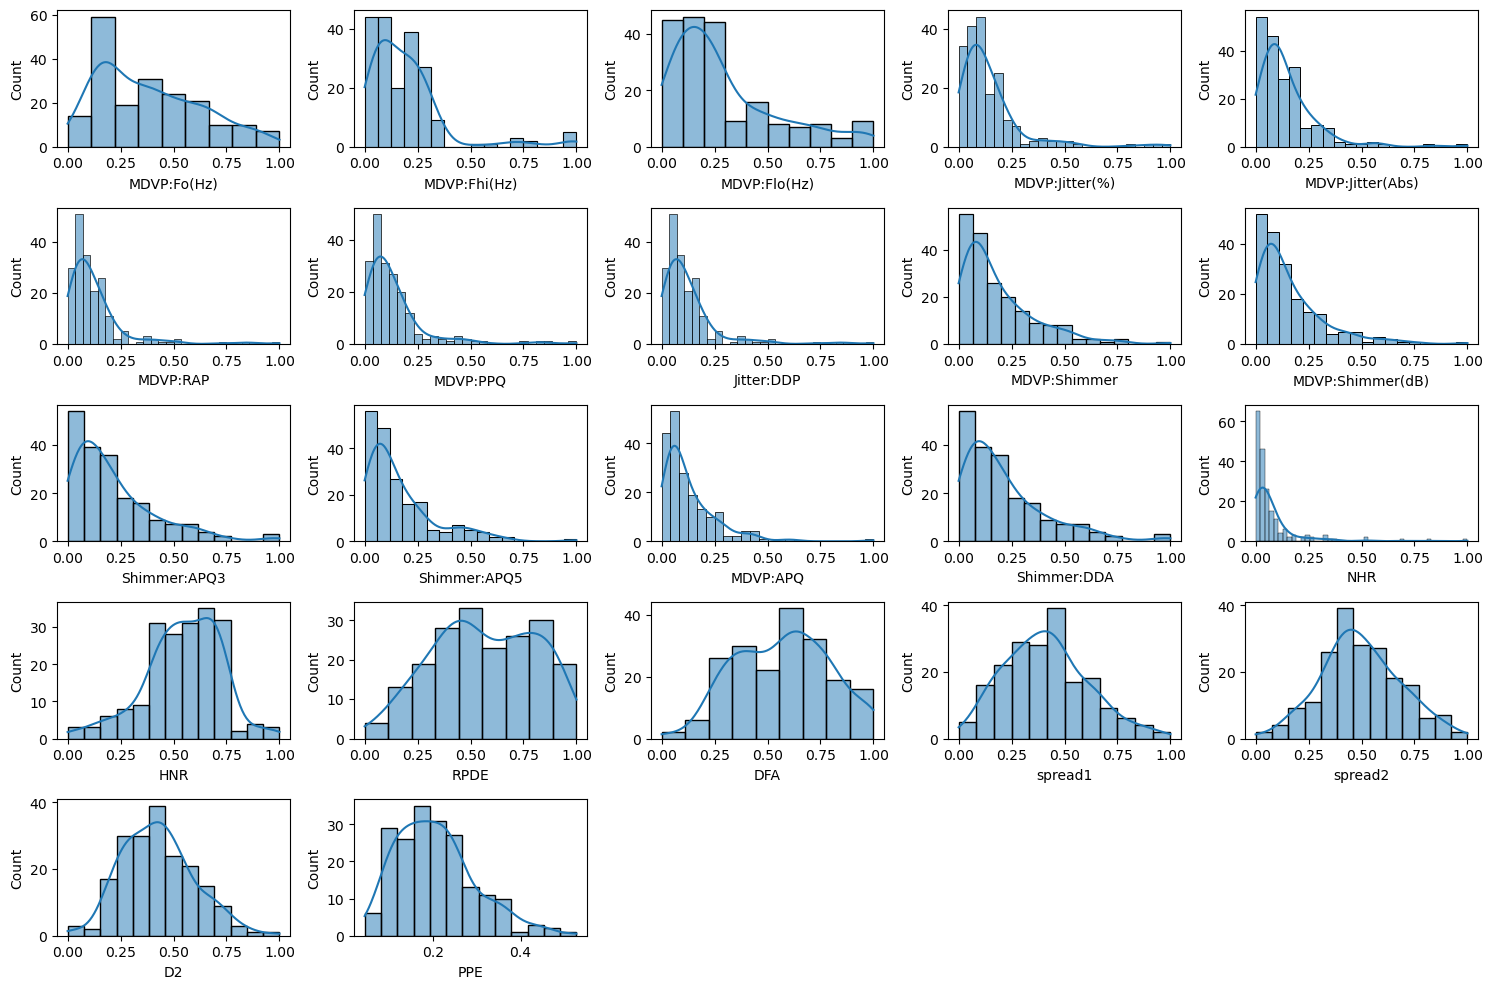

In [26]:
# Generate and display histograms for feature distribution
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[feature], kde=True)
plt.tight_layout()
plt.show()

# **5. Discussion**
This paper proposes a novel method for distinguishing between those who have
Parkinson’s disease (PD) and those who do not, based on Bayesian Optimization-Support
Vector Machine (BO-SVM). Bayesian Optimization (BO) with a hyperparameter tuning
technique is used to optimize the hyperparameters for six distinct machine learning models,
namely, Support Vector Machine (SVM), Random Forest (RF), Logistic Regression (LR),
Naive Bayes (NB), Ridge Classifier (RC), and Decision Tree (DT). The dataset utilized in
this study has 23 characteristics and 195 occurrences, and the models’ performance was
measured using four metrics: accuracy, F1-score, recall, and precision.
The findings revealed that the SVM model performed the best among all models, both
before and after hyperparameter tuning, with an accuracy of 92.3 percent reached using BO.
The paper presented an essential contribution to the subject of machine learning and its
applications in healthcare. For diagnosing speech deficits in patients at the early stages of
central nervous system illnesses, Lauraitis et al. used a Bidirectional Long Short-Term
Memory (BiLSTM) neural network and a Wavelet Scattering Transform with Support Vector
Machine (WST-SVM) classifier (CNSD). The study included 339 voice samples obtained
from 15 participants: 7 with early stage CNSD (3 Huntington, 1 Parkinson, 1 cerebral palsy,
1 post stroke, 1 early dementia), and 8 healthy subjects. Their speech data are collected
using a voice recorder from the Neural Impairment Test Suite (NITS) mobile application.
Features are extracted from pitch contours, mel-frequency cepstral coefficients (MFCC) gammatone cepstral coefficients (GTCC), Gabor (analytic Morlet) wavelets, and auditory
spectrograms. Ultimately, 94.50% (BiLSTM) and 96.3% (WST-SVM) accuracy is achieved
for solving the healthy vs. impaired classification problem. The developed method can be
applied for automated CNSD patient health state monitoring and clinical decision support
systems, and as a part of the Internet of Medical Things (IoMT). In this work, we utilized
BO with SVM. Therefore, the questions here are: although there are several hyperparameter
optimization (HPO) tools, why the choice of BO? Does BO carry any distinct advantages
when compared with other HPO methods. Will the ML algorithms give better results when
optimized using other methods? In answer to these questions, BO has several advantages
compared to other hyperparameter optimization (HPO) methods.
1. Model-based approach: BO uses a probabilistic model to represent the relationship
between the hyperparameters and the performance of the model. This allows BO
to make informed decisions about which hyperparameters to try next based on the
results of previous trials.
2. Handling of noisy objectives: BO can handle noisy or stochastic objective functions,
such as those that may be encountered in real-world machine learning applications.
3. Incorporation of prior knowledge: BO allows for the incorporation of prior knowledge about
the objective function through the use of a prior distribution over the hyperparameters.
4. Efficient exploration–exploitation trade-off: BO balances exploration (trying new, potentially better hyperparameters) and exploitation (using the current best hyperparameters)
in an efficient manner, allowing for faster convergence to the optimal hyperparameters.

A single observation from the original dataset is utilized as the validation set, also
known as the test set, in leave-one-out cross validation (LOOCV), and the remaining
observations constitute the training set. This technique is performed N times, with each
observation serving as a validation set once. The LOOCV approach was used to measure
classifier performance on unseen instances in separate and pooled datasets. The proportion
of correct classifications over the N repetitions is used to define performance here. To
ensure that the training set’s attributes, and thus the trained classifier’s, are not influenced
by the validation sample, the test subject was removed from the initial dataset before
applying the training set (with N1 samples), in order to obtain the subject scores required to
train the classifier. The classifier was then utilized to determine the test subject’s label.
In this work, we do not need to use LOOCV cross validation because we utilized BO
optimization, and the achieved results are promising compared with other results, as
shown in Algorithm 1 and Figure 2.
We conducted a comparison study using the same standard dataset published in the
UCI repository in to compare the proposed model with the latest technique. Li et al. 
showed NB, 3-NN, SVM-linear, and SVM-poly, with respective accuracies of 66.31%, 67.73%,
53.91%, and 55.41%. Sajal et all. provided a method based on KNN, SVM, and NB,
with accuracies of 90.50%, 87.00%, and 81.00% for five levels of classification in tremor
analysis. Furthermore, Haritha et al. obtained 76.20%, 86.71%, 91.83%, 82.90%, and
87.03% accuracy utilizing NB, DT, RF, MLP, and LR, respectively. Abayomi-Alli et al. 
demonstrated a Bidirectional Long Short-Term Memory (BiLSTM) for the UCI PD dataset,
and their model achieved an accuracy of 82.86% with the original data. Fang and Liang 
presented the UCI dataset for Parkinson’s disease and optimization algorithms such as
Particle Swarm Optimization (PSO), Whale Optimization Algorithm (WOA), Grasshopper
Optimization Algorithm (GOA), Binary PSO (BPSO), and Binary GOA (BGOA) compared
to the Nonlinear Binary Grasshopper Whale Optimization Algorithm (NL-BGWOA), and
the results showed that the NL-BGWOA achieved 91.30% higher than other optimization
algorithms. Figure 10 demonstrates the comparative study of the proposed method based
on BO-SVM with the mentioned methods based on the same applied PD standard dataset